In [1]:
!pip install spacy

In [2]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2022-12-13 00:29:13.297984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-12-13 00:29:13.298032: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-13 00:29:18.466660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-12-13 00:29:18.467474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-12-13 00:29:18.468218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-12-13 00:29:18.468961: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [3]:
!pip install wordcloud

In [4]:
import numpy as np # linear algebra 
import pandas as pd # data processing , csv file I|O eg ( pd.read csv)
import string # special operation string
import spacy # language model
from matplotlib import pyplot as plt
from wordcloud import wordcloud ,STOPWORDS


In [85]:
aff = pd.read_csv('Afinn.csv', encoding= 'latin_1')

In [86]:
aff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [87]:
df = pd.read_csv('Elon_musk.csv', encoding= 'latin_1', index_col= 0)

In [88]:
df

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [89]:
tweets1 = [x.strip().lower() for x in df['Text']]
tweets = [x for x in tweets1 if x]

In [90]:
tweets1 == tweets

True

In [91]:
tweets

['@kunalb11 i\x92m an alien',
 '@id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it?',
 '@joerogan @spotify great interview!',
 '@gtera27 doge is underestimated',
 '@teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!!',
 'happy new year of the ox! https://t.co/9wfkmyu2oj',
 'frodo was the underdoge,\nall thought he would fail,\nhimself most of all. https://t.co/zgxjfdzzrm',
 '@owensparks_ @flcnhvy @anonyx10 haha thanks :)',
 '@flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation.',
 'the most entertaining outcome is the most likely',
 '@givedirectly just sent some',
 'just agree to do clubhouse with @kanyewest',
 'https://t.co/3rwe9uhsts',
 '@geoffkeighley @unrealengine it\x92s getting real',
 'bought some dogecoin for lil x, so he can be a toddler hodler',
 '@joshmanmode he definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg thanks for fixing',

In [92]:
import nltk

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Yash
[nltk_data]     Bhosale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
from nltk.tokenize import TweetTokenizer

In [95]:
from nltk import tokenize

In [96]:
tt = TweetTokenizer(strip_handles=True)

In [97]:
clean_sent = tt.tokenize(' '.join(tweets))
' '.join(clean_sent)

'i \x92 m an alien ray tracing on cyberpunk with hdr is next-level . have you tried it ? great interview ! doge is underestimated congratulations tesla china for amazing execution last year . now on to the next for even more ! ! happy new year of the ox ! https://t.co/9wfkmyu2oj frodo was the underdoge , all thought he would fail , himself most of all . https://t.co/zgxjfdzzrm haha thanks :) indeed ! tweets definitely do not represent real-world time allocation . the most entertaining outcome is the most likely just sent some just agree to do clubhouse with https://t.co/3rwe9uhsts it \x92 s getting real bought some dogecoin for lil x , so he can be a toddler hodler he definitely has issues , but the sentencing seems a bit high thanks for fixing please unlock my account <u+0001f923> <u+0001f923> this is true power haha https://t.co/fc9uhqsd7o any crypto wallet that won \x92 t give you your private keys should be avoided at all costs your app sucks rt : nasa has selected falcon heavy to 

In [98]:
clean_sent = tokenize.sent_tokenize(' '.join(clean_sent))
clean_sent

['i \x92 m an alien ray tracing on cyberpunk with hdr is next-level .',
 'have you tried it ?',
 'great interview !',
 'doge is underestimated congratulations tesla china for amazing execution last year .',
 'now on to the next for even more ! !',
 'happy new year of the ox !',
 'https://t.co/9wfkmyu2oj frodo was the underdoge , all thought he would fail , himself most of all .',
 'https://t.co/zgxjfdzzrm haha thanks :) indeed !',
 'tweets definitely do not represent real-world time allocation .',
 'the most entertaining outcome is the most likely just sent some just agree to do clubhouse with https://t.co/3rwe9uhsts it \x92 s getting real bought some dogecoin for lil x , so he can be a toddler hodler he definitely has issues , but the sentencing seems a bit high thanks for fixing please unlock my account <u+0001f923> <u+0001f923> this is true power haha https://t.co/fc9uhqsd7o any crypto wallet that won \x92 t give you your private keys should be avoided at all costs your app sucks rt

In [99]:
sent = pd.DataFrame(clean_sent, columns= ['Sentences'])

In [100]:
sent

,Sentences
0,i  m an alien ray tracing on cyberpunk with h...
1,have you tried it ?
2,great interview !
3,doge is underestimated congratulations tesla c...
4,now on to the next for even more ! !
...,...
907,everything we  ve ever sensed or thought has ...
908,"not actually a payout , just a vesting of stoc..."
909,"it may never pay out , as the stock can  t b ..."
910,details aug 28 . ai symbiosis while u wait the...


In [101]:
affinity = aff.set_index('word')['value'].to_dict()

In [102]:
affinity

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [103]:
nlp = spacy.load('en_core_web_md')

In [104]:
def cal_score(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for x in sentence:
            sent_score += affinity.get(x.lemma_,0)
    return sent_score

In [105]:
cal_score('anger')

-3

In [106]:
sent['Sentiment'] = sent['Sentences'].apply(cal_score)
sent

,Sentences,Sentiment
0,i  m an alien ray tracing on cyberpunk with h...,0
1,have you tried it ?,0
2,great interview !,3
3,doge is underestimated congratulations tesla c...,5
4,now on to the next for even more ! !,0
...,...,...
907,everything we  ve ever sensed or thought has ...,2
908,"not actually a payout , just a vesting of stoc...",0
909,"it may never pay out , as the stock can  t b ...",-4
910,details aug 28 . ai symbiosis while u wait the...,-2


In [107]:
sent['Words'] = sent['Sentences'].str.split().apply(len)

In [108]:
sent

,Sentences,Sentiment,Words
0,i  m an alien ray tracing on cyberpunk with h...,0,14
1,have you tried it ?,0,5
2,great interview !,3,3
3,doge is underestimated congratulations tesla c...,5,12
4,now on to the next for even more ! !,0,10
...,...,...,...
907,everything we  ve ever sensed or thought has ...,2,19
908,"not actually a payout , just a vesting of stoc...",0,12
909,"it may never pay out , as the stock can  t b ...",-4,35
910,details aug 28 . ai symbiosis while u wait the...,-2,52


In [109]:
sent[sent['Sentiment'] == sent['Sentiment'].min()]

,Sentences,Sentiment,Words
633,very ba https://t.co/tjsh1exz1q it  s too emb...,-8,61


In [110]:
pd.options.display.max_colwidth = 1000

In [111]:
sent[sent['Sentiment'] == sent['Sentiment'].max()]

,Sentences,Sentiment,Words
707,"we just haven  t observed the https://t.co/mezrzcnewo pretty much cybertruck option package https://t.co/6vz4xnohf9 wow my button-twiddling makes no sense at all <u+0001f923> <u+0001f923> you got it https://t.co/f2rxgcz964 that  s a great one  tanks 4 the memery  - panzer of the lake some big milestones coming up https://t.co/k3v3yddg6j africa is big bold move , sir , bold move thank you , tesla is most honored !",17,69


In [112]:
import seaborn as sns

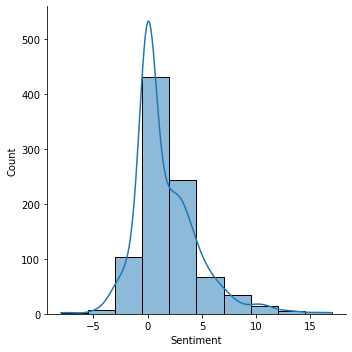

In [113]:
sns.displot(sent['Sentiment'],kde = True,bins =10)

<AxesSubplot:xlabel='Words', ylabel='Sentiment'>

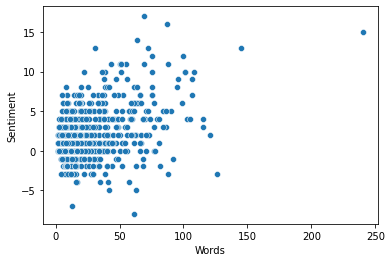

In [114]:
sns.scatterplot(y='Sentiment',x='Words',data=sent)

In [115]:
sent[sent['Sentiment'] > 5]

,Sentences,Sentiment,Words
9,"the most entertaining outcome is the most likely just sent some just agree to do clubhouse with https://t.co/3rwe9uhsts it  s getting real bought some dogecoin for lil x , so he can be a toddler hodler he definitely has issues , but the sentencing seems a bit high thanks for fixing please unlock my account <u+0001f923> <u+0001f923> this is true power haha https://t.co/fc9uhqsd7o any crypto wallet that won  t give you your private keys should be avoided at all costs your app sucks rt : nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission !",7,107
17,"back to work i go does seem a bit high doge appears to be inflationary , but is not meaningfully so ( fixed # of coins per unit time ) , whereas https://t.co/4uh4rarc6t wow 1 . orbital launch tower that can stack 2 . enough raptors for orbit booster 3 . improve ship & booster mass back to work tonight !",6,61
33,"yes , but engines have a min throttle point where there is flameout risk , so la https://t.co/thniyssnwn yes it was foolish of us not to start 3 engines & immediately shut down 1 , as 2 are needed to land i am become meme , destroyer of shorts might actually happen sandstorm is a masterpiece we were too dumb next time , we try pull * up * method https://t.co/j1m7whlrdr low-key loki no highs , no lows , only doge no need to be a gigachad to own dogecoin is the people  s crypto ur welcome https://t.co/e2kf57klxb the most entertaining outcome is the most likely doge https://t.co/vviuzwhodt high seas & wind this was a tough one https://t.co/bey7pefpcj rt : watch falcon 9 launch 60 starlink satellites <u+2192> https://t.co/bjfjlczwdk https://t.co/ln95reesbw off twitter for a while it will be filled with graffiti art <u+043c> <u+044b> <u+0441> <u+0434> <u+0435> <u+043b> <u+0430> <u+0435> <u+043c> giga berlin progress https://t.co/ekpg5qcbui neuralink is working super hard to ensure impl...",15,240
39,"cryoproof , then install engines starship sn9 & sn10 https://t.co/urtpjn7amo in retrospect , it was inevitable great shot live by the sword , die by the sword entropy buy & hold companies that make goods & produce services you love earth is small & we are smaller still https://t.co/gtohclgj82 <u+0001f440> with cyberpunk , even the hotfixes literally have hotfixes , but great game https://t.co/a6kmk0pegm the dollar is shorting itself indeed shopify is great too .",12,75
42,the economy  making useful products & providing great services  is what actually matters .,6,16
...,...,...,...
846,"impressive tianwen - 1 mars rover mission launched by china today https://t.co/fsya3i0hru rt : https://t.co/jmkacbrb5d good article similar problem with us data good point you don  t have a soul , you are a soul adding people in next version 2 minutes later https://t.co/o5fbbtan1s just another day in 2020 individualized mass transit is the future no , best to have people seated for safety & speed of travel coming soon https://t.co/6noglix6b5 human overseen at first , then fully self-driving can  t say , but it involves a <u+0001f43b> <u+0001f525> <u+0001f525> <u+0001f923> this one stings where are the memes ?",10,101
881,"ratio of retirees to workers is https://t.co/qivas5gtpc considering small note : latch on post near base is gone & powered ethernet wire is less obtrusive in production version https://t.co/xxrxfrqhbs this thing we call  money  is just a ( slow , lossy & unsecure ) database for labor allocati https://t.co/5vcgj8o31r trying to set a good example haha .",6,59
888,should do this automatically mass to orbit is a more accura https://t.co/ltqh2vulgc cute wow reusability is essential .,6,18
893,"welcome anytime well , i do care very much about sustainability of civilization , but there is some truth to the irony part haha yes , in plan .",7,29
